<a href="https://colab.research.google.com/github/miraculusik/tensorflow-deep-learning-practices/blob/main/milestone_project_1_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-a4390cdd-8e7d-f6e3-ce86-91d07c982602)


In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds

(train_data, test_data), ds_info = tfds.load(name="food101",
                                             split=["train", "validation"],
                                             shuffle_files=True,
                                             as_supervised=True,
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteP8DU1U/food101-train.tfrecord


  0%|          | 0/75750 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteP8DU1U/food101-validation.tfrecord


  0%|          | 0/25250 [00:00<?, ? examples/s]

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [4]:
ds_info

tfds.core.DatasetInfo(
    name='food101',
    version=2.0.0,
    description='This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.',
    homepage='https://www.vision.ee.ethz.ch/datasets_extra/food-101/',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
    }),
    total_num_examples=101000,
    splits={
        'train': 75750,
        'validation': 25250,
    },
    supervised_keys=('image', 'label'),
    citation="""@inproceedings{bossard14,
      title = {Food-101 -- Mining Discriminative Components with Random Forests},
      

In [5]:
class_names = ds_info.features["label"].names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [6]:
for image, label in test_data.take(1):
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Class: {label}
  Class Name: {class_names[label]}
  """)


  Image shape: (512, 512, 3)
  Image dtype: <dtype: 'uint8'>
  Class: 73
  Class Name: panna_cotta
  


In [7]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[204, 188, 165],
        [205, 189, 166],
        [206, 190, 167],
        ...,
        [201, 181, 154],
        [202, 183, 153],
        [199, 180, 150]],

       [[205, 188, 168],
        [205, 189, 166],
        [206, 190, 167],
        ...,
        [202, 182, 155],
        [202, 182, 155],
        [199, 180, 150]],

       [[206, 189, 171],
        [205, 188, 168],
        [205, 188, 168],
        ...,
        [203, 183, 156],
        [202, 182, 155],
        [199, 179, 152]],

       ...,

       [[207, 194, 177],
        [207, 194, 177],
        [206, 193, 176],
        ...,
        [223, 208, 187],
        [223, 208, 189],
        [222, 207, 188]],

       [[208, 195, 179],
        [207, 194, 178],
        [207, 194, 177],
        ...,
        [221, 206, 185],
        [221, 206, 187],
        [221, 206, 187]],

       [[207, 194, 178],
        [206, 193, 177],
        [206, 193, 176],
        ...,
        [222, 207, 18

In [8]:
tf.reduce_min(image).numpy(), tf.reduce_max(image).numpy()

(0, 255)

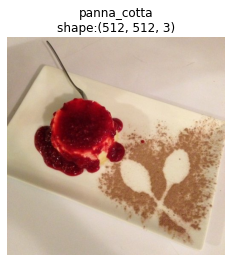

In [9]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.title(f"{class_names[label]}\nshape:{image.shape}")
plt.axis(False);

In [10]:
def preprocess_image(image, label, img_shape=224):
  image = tf.image.resize(image, size=[img_shape, img_shape])
  image = tf.cast(image, tf.float32)
  return image, label

In [11]:
preprocess_image(image, label)

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[204.87245, 188.64285, 166.33163],
         [206.33163, 190.33163, 167.33163],
         [204.20409, 189.20409, 166.20409],
         ...,
         [202.71938, 181.71938, 160.99486],
         [199.78574, 179.78574, 154.64285],
         [200.92847, 181.51523, 152.75496]],
 
        [[205.95409, 188.95409, 170.86224],
         [204.13776, 187.13776, 167.2704 ],
         [204.19897, 189.19897, 168.19897],
         ...,
         [203.     , 182.     , 162.88776],
         [202.07144, 182.07144, 157.92346],
         [201.92346, 181.92346, 156.11728]],
 
        [[205.14287, 187.64796, 172.79082],
         [204.     , 186.9847 , 171.0153 ],
         [204.59694, 189.59694, 170.59694],
         ...,
         [202.12244, 181.12244, 162.88771],
         [202.52548, 181.52548, 162.81117],
         [202.28578, 181.56642, 160.     ]],
 
        ...,
 
        [[208.13774, 192.13774, 176.13774],
         [207.62749, 194.19896, 176.77043]

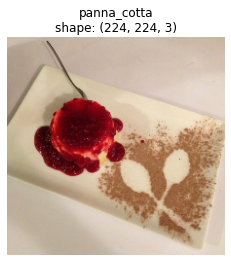

In [12]:
preprocessed_image, preprocess_image_label = preprocess_image(image, label)

plt.imshow(preprocessed_image/255.)
plt.title(f"{class_names[preprocess_image_label]}\nshape: {preprocessed_image.shape}")
plt.axis(False);

In [13]:
train_data = train_data.map(map_func=preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

test_data = test_data.map(map_func=preprocess_image,num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
train_data, test_data

(<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>)

In [15]:
# Setup mixed precision
from tensorflow.keras import mixed_precision

mixed_precision.set_global_policy(policy="mixed_float16")

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


In [16]:
mixed_precision.global_policy()

<Policy "mixed_float16">

In [17]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# create base model
input_shape=(224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# create functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)

model = tf.keras.Model(inputs, outputs)

#Compile Model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

16719872/16705208 [==============================] - 0s 0us/step


In [18]:
# Check out model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 101)               129381    
_________________________________________________________________
softmax_float32 (Activation) (None, 101)               0         
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [19]:
# model layers
for layer in model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
global_average_pooling_layer True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


In [20]:
# base_model layers
for layer in model.layers[1].layers[:20]:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <Policy "mixed_float16">
block2a_expand_bn False flo

# TODO: Fit the feature extraction model

In [21]:
# Fit the feature extraction model for 3 epochs with tensorboard and model checkpoint callbacks
# tensorboard callback
import datetime

def create_tensorboard(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y-%m-%d_%H:%M:%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir)
  print("Tensorboard log_dir: ", log_dir)
  return tensorboard_callback

# model checkpoint callback
checkpoint_path = "model_checkpoint/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=0)

In [22]:
feature_extraction_model_history = model.fit(train_data,
                                             epochs=5,
                                             steps_per_epoch = len(train_data),
                                             validation_data = test_data,
                                             validation_steps= int(0.15* len(test_data)),
                                             callbacks=[model_checkpoint,
                                                        create_tensorboard(dir_name="tensorboard_models",
                                                                           experiment_name="feature_extraction_model")])

Tensorboard log_dir:  tensorboard_models/feature_extraction_model/2021-08-24_12:07:16
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


2368/2368 [==============================] - 246s 86ms/step - loss: 1.8204 - accuracy: 0.5595 - val_loss: 1.2211 - val_accuracy: 0.6785
Epoch 2/5
2368/2368 [==============================] - 185s 74ms/step - loss: 1.2932 - accuracy: 0.6662 - val_loss: 1.1371 - val_accuracy: 0.7015
Epoch 3/5
2368/2368 [==============================] - 162s 68ms/step - loss: 1.1430 - accuracy: 0.7034 - val_loss: 1.0946 - val_accuracy: 0.7066
Epoch 4/5
2368/2368 [==============================] - 165s 69ms/step - loss: 1.0449 - accuracy: 0.7267 - val_loss: 1.0742 - val_accuracy: 0.7055
Epoch 5/5
2368/2368 [==============================] - 161s 67ms/step - loss: 0.9725 - accuracy: 0.7431 - val_loss: 1.0755 - val_accuracy: 0.7068


In [23]:
# Evaluate model on whole test dataset
feature_extraction_model_results = model.evaluate(test_data)

790/790 [==============================] - 56s 71ms/step - loss: 1.0728 - accuracy: 0.7076


# TODO: Save the whole model to file

In [24]:
# Save model locally (if you're using Google Colab, your saved model will Colab instance terminates)
model.save("model_save/")

INFO:tensorflow:Assets written to: model_save/assets


INFO:tensorflow:Assets written to: model_save/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [25]:
# Load model previously saved above

loaded_model = tf.keras.models.load_model("model_save/")

In [26]:
# Check the layers in the base model and see what dtype policy they're using
for layer in loaded_model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
global_average_pooling_layer True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


In [27]:
for layer in loaded_model.layers[1].layers[:10]:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 True float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">


In [28]:
# Check loaded model performance (this should be the same as results_feature_extract_model)
loaded_model_results = model.evaluate(test_data)

790/790 [==============================] - 47s 60ms/step - loss: 1.0728 - accuracy: 0.7076


In [29]:
import numpy as np

np.isclose(feature_extraction_model_results, loaded_model_results)

array([ True,  True])

# TODO: Preparing our model's layers for fine-tuning

In [30]:
# Download the saved model from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision.zip

--2021-08-24 12:26:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16976857 (16M) [application/zip]
Saving to: ‘07_efficientnetb0_feature_extract_model_mixed_precision.zip’

07_efficientnetb0_f 100%[===================>]  16.19M  78.4MB/s    in 0.2s    

2021-08-24 12:26:27 (78.4 MB/s) - ‘07_efficientnetb0_feature_extract_model_mixed_precision.zip’ saved [16976857/16976857]



In [31]:
# Unzip the SavedModel downloaded from Google Stroage
!mkdir downloaded_gs_model # create new dir to store downloaded feature extraction model
!unzip 07_efficientnetb0_feature_extract_model_mixed_precision.zip -d downloaded_gs_model

Archive:  07_efficientnetb0_feature_extract_model_mixed_precision.zip
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/variables.data-00000-of-00001  
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/variables.index  
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/saved_model.pb  
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/assets/


In [32]:
# Load and evaluate downloaded GS model
gs_model = tf.keras.models.load_model("/content/downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision")

In [33]:
# Get a summary of the downloaded model
gs_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
pooling_layer (GlobalAverage (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 101)               129381    
_________________________________________________________________
softmax_float32 (Activation) (None, 101)               0         
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [34]:
# How does the loaded model perform? (evaluate it on the test dataset)
gs_model_results = gs_model.evaluate(test_data)

790/790 [==============================] - 50s 61ms/step - loss: 1.0881 - accuracy: 0.7065


In [35]:
# Set all of the layers .trainable variable in the loaded model to True (so they're unfrozen)
for layer in gs_model.layers:
  layer.trainable = True

In [36]:
for layer in gs_model.layers[1].layers[:20]:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 True float32 <Policy "float32">
rescaling True float32 <Policy "mixed_float16">
normalization True float32 <Policy "float32">
stem_conv_pad True float32 <Policy "mixed_float16">
stem_conv True float32 <Policy "mixed_float16">
stem_bn True float32 <Policy "mixed_float16">
stem_activation True float32 <Policy "mixed_float16">
block1a_dwconv True float32 <Policy "mixed_float16">
block1a_bn True float32 <Policy "mixed_float16">
block1a_activation True float32 <Policy "mixed_float16">
block1a_se_squeeze True float32 <Policy "mixed_float16">
block1a_se_reshape True float32 <Policy "mixed_float16">
block1a_se_reduce True float32 <Policy "mixed_float16">
block1a_se_expand True float32 <Policy "mixed_float16">
block1a_se_excite True float32 <Policy "mixed_float16">
block1a_project_conv True float32 <Policy "mixed_float16">
block1a_project_bn True float32 <Policy "mixed_float16">
block2a_expand_conv True float32 <Policy "mixed_float16">
block2a_expand_bn True float32 <Policy "mixed_float

In [37]:
# Check to see what dtype_policy of the layers in your loaded model are
for layer in gs_model.layers:
  print(layer.name, layer.dtype_policy)

input_layer <Policy "float32">
efficientnetb0 <Policy "mixed_float16">
pooling_layer <Policy "mixed_float16">
dense <Policy "mixed_float16">
softmax_float32 <Policy "float32">


In [38]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
# Monitor the val_loss and stop training if it doesn't improve for 3 epochs
# See: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping for more
# YOUR_CODE_HERE
earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                          patience=3)

# Create ModelCheckpoint callback to save best model during fine-tuning
# Save the best model only
# Monitor val_loss while training and save the best model (lowest val_loss)
# See: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint for more
# YOUR_CODE_HERE
checkpoint_path = "model_checkpoints/gs_model/"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         monitor="val_loss",
                                                         save_weights_only=True,
                                                         save_best_only=True)

In [39]:
# Compile the model ready for fine-tuning
# Use the Adam optimizer with a 10x lower than default learning rate
# YOUR_CODE_HERE

gs_model.compile(loss="sparse_categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(1e-4),
                 metrics=["accuracy"])

In [40]:
# Start to fine-tune (all layers)
# Use 100 epochs as the default
# Validate on 15% of the test_data
# Use the create_tensorboard_callback, ModelCheckpoint and EarlyStopping callbacks you created eaelier
# YOUR_CODE_HERE

gs_model_history = gs_model.fit(train_data,
                                epochs=100,
                                validation_data=test_data,
                                validation_steps= int(0.15*len(test_data)),
                                callbacks=[
                                           checkpoint_callback,
                                           earlystopping_callback,
                                           create_tensorboard(dir_name="tensorboard_models",
                                                              experiment_name="gs_model")
                                ])

Tensorboard log_dir:  tensorboard_models/gs_model/2021-08-24_12:27:32
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


2368/2368 [==============================] - 340s 138ms/step - loss: 0.9225 - accuracy: 0.7526 - val_loss: 0.7851 - val_accuracy: 0.7781
Epoch 2/100
2368/2368 [==============================] - 322s 135ms/step - loss: 0.5787 - accuracy: 0.8399 - val_loss: 0.7756 - val_accuracy: 0.7876
Epoch 3/100
2368/2368 [==============================] - 325s 137ms/step - loss: 0.3291 - accuracy: 0.9073 - val_loss: 0.8513 - val_accuracy: 0.7855
Epoch 4/100
2368/2368 [==============================] - 324s 136ms/step - loss: 0.1713 - accuracy: 0.9503 - val_loss: 1.0202 - val_accuracy: 0.7762
Epoch 5/100
2368/2368 [==============================] - 324s 136ms/step - loss: 0.1106 - accuracy: 0.9653 - val_loss: 1.0590 - val_accuracy: 0.7797


In [40]:
# Save model locally (note: if you're using Google Colab and you save your model locally, it will be deleted when your Google Colab session ends)

gs_model.save("gs_model_save/")

In [43]:
# Evaluate mixed precision trained fine-tuned model (this should beat DeepFood's 77.4% top-1 accuracy)
gs_model_fine_tune_results = gs_model.evaluate(test_data)

790/790 [==============================] - 47s 60ms/step - loss: 1.0839 - accuracy: 0.7792
